# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
import re
import nltk
import string

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Data import

In [4]:
data = pd.read_csv("Language Detection.csv")
data.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [5]:
data.shape #size of data set

(10337, 2)

# cleaning

In [6]:
data.isnull().sum()

Text        0
Language    0
dtype: int64

In [7]:
data["Language"].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

# Visualization

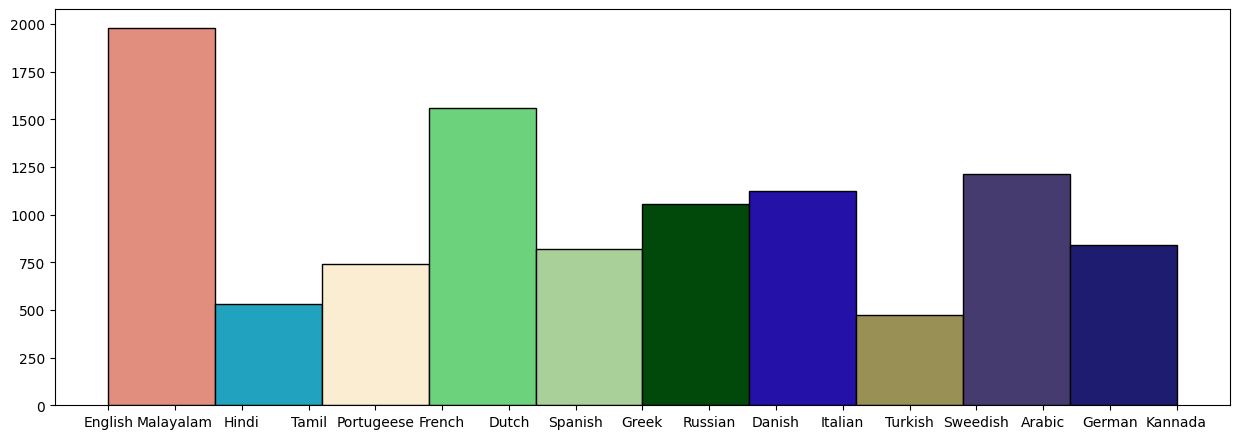

In [8]:

import random
plt.rcParams["figure.figsize"] = [12.50, 4.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
d= data["Language"]

N, bins, patches = ax.hist(d, edgecolor='black', linewidth=1)


for i in range(len(N)):
   patches[i].set_facecolor("#" + ''.join(random.choices("ABCDEF" + string.digits, k=6)))


plt.show()

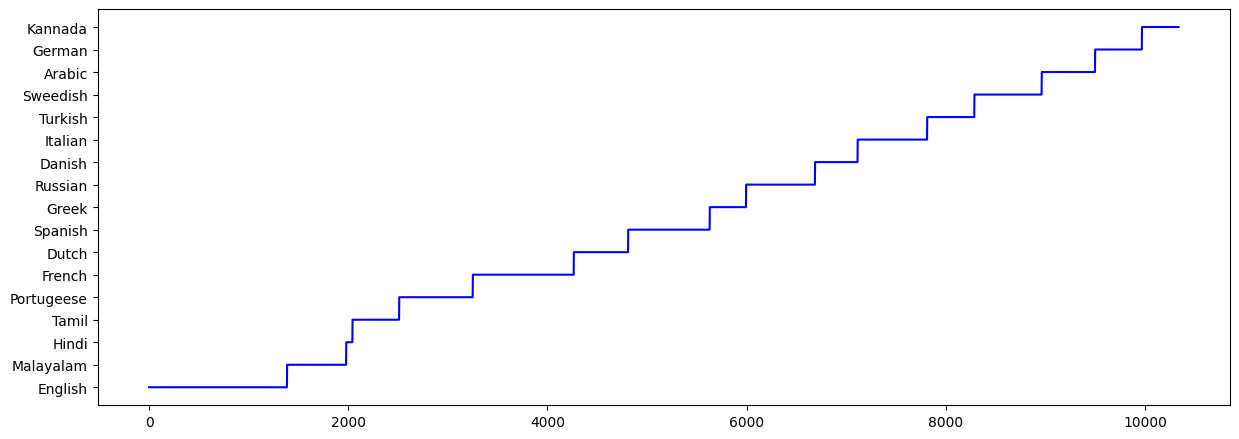

In [9]:
plt.plot(data["Language"],  color="blue");

# MODEL

In [10]:
x = np.array(data["Text"])
y = np.array(data["Language"])

In [11]:
cv = CountVectorizer()
X=cv.fit_transform(x)

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
model = MultinomialNB()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.977725674091442

# USER INPUT

In [14]:
user = input("Enter the Text:  ")
d = cv.transform([user]).toarray()
op = model.predict(d)
print(op)

Enter the Text:  ಇಂಗ್ಲಿಷ್‌ನಲ್ಲಿ ಕನ್ನಡ ಪದಗಳ ಪಟ್ಟಿ: ; ನಾನು/ಸಂಖ್ಯೆ, ನಾನು ; ನಿನು/ನಿಮ್/ನಿ, ನೀವು ; ಇಲ್ಲಾ, ಇಲ್ಲ ; ಕೆಲ್ಸ, ಕೆಲಸ ; ಬನ್ನಿ/ಬಾರಾ/ಬಾರಪ್ಪ, ಬನ್ನಿ.
['Kannada']
